In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# csv read
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')

# 性別を0, 1に変更
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1

# 年齢の欠損値を中央値で埋める
train['Age'].fillna(train['Age'].median(), inplace=True)


# 乗船地は欠損値２行なので、その行は削除
train = train[train['Embarked'].notnull()]

# 新しい特徴量、家族数を作成
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1

# 家族数と生存率をプロット
#sns.countplot(x='FamilySize', data=train, hue='Survived')

"""
グラフから読み取れること
* 家族数が１、もしくは５人以上の時は死亡率が生存率より高くなる
* 家族数が１の客が圧倒的に多い
"""

# 家族数が１か１じゃないかの特徴量を作成する
train['Alone'] = train['FamilySize'].map(lambda x: 1 if x == 1 else 0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1


In [ ]:
sns.countplot(x='Survived', data=train) 
plt.title('Survived')
plt.xticks([0, 1],['Dead', 'Survived'])
plt.show()

In [ ]:
# 男女別の生存者数を可視化
sns.countplot(x='Sex', hue='Survived', data=train)
plt.legend(['Dead', 'Servived'])
plt.show()
# SexとSurvivedをクロス集計する
display(pd.crosstab(train['Sex'], train['Survived']))
# クロス集計しSexごとに正規化する
display(pd.crosstab(train['Sex'], train['Survived'], normalize='index'))

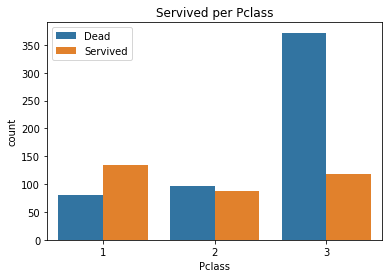

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.373832,0.626168
2,0.527174,0.472826
3,0.757637,0.242363


In [4]:
# チケットクラスごとの生存率を可視化
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Servived per Pclass')
plt.legend(['Dead', 'Servived'])
plt.show()

display(pd.crosstab(train['Pclass'], train['Survived']))
display(pd.crosstab(train['Pclass'], train['Survived'], normalize='index'))

# グラフから読み取れること。
# * 3が最も死んでいる。1は生存者の方が多い2よりも３の方が生存者が多い

In [23]:
# 生存者の割合をチケットクラスごとに出す
# クラスごとの総数
#print(len(train[train['Pclass'] == 1]))
#print(len(train.query('Pclass == 1')))
#print(train.query('Pclass == 1').shape[0])
pclass_1 = train.query('Pclass == 1')
pclass_2 = train.query('Pclass == 2')
pclass_3 = train.query('Pclass == 3')

# クラスごとの生存者数のパーセントの特徴量を追加
print(pclass_1.query('Survived == 1').shape[0])
train['Servived_Per_Pclass'] = np.nan


134


NameError: name 'np' is not defined